In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
df=pd.read_csv('/kaggle/input/covid-19-csv/covid_synthetic_dataset.csv')
df

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,42,Male,100.0,Mild,Delhi,Yes
2,31,Female,101.0,Mild,Delhi,No
3,65,Male,101.0,Mild,Mumbai,No
4,81,Female,101.0,Mild,Mumbai,No
5,80,Male,100.0,Mild,Bangalore,No


In [6]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,42,Male,100.0,Mild,Delhi,Yes
2,31,Female,101.0,Mild,Delhi,No
3,65,Male,101.0,Mild,Mumbai,No
4,81,Female,101.0,Mild,Mumbai,No


In [8]:
df.isnull().sum()

age          0
gender       0
fever        0
cough        0
city         0
has_covid    0
dtype: int64

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('/kaggle/input/covid-19-csv/covid_synthetic_dataset.csv')
X = df.drop('has_covid', axis=1)
y = df['has_covid']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.head()


,age,gender,fever,cough,city
0,60,Male,103.0,Mild,Kolkata
2,31,Female,101.0,Mild,Delhi
4,81,Female,101.0,Mild,Mumbai
5,80,Male,100.0,Mild,Bangalore


#### SimpleImputer

In [12]:
from sklearn.impute import SimpleImputer

si = SimpleImputer()
X_train_fever = si.fit_transform(X_train[['fever']])
X_test_fever = si.fit_transform(X_test[['fever']])
X_train_fever.shape


(4, 1)

In [14]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['Mild', 'Strong']])
X_train_cough = oe.fit_transform(X_train[['cough']])
X_test_cough = oe.transform(X_test[['cough']])
X_train_cough.shape


(4, 1)

In [15]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', sparse=False)
X_train_gender_city = ohe.fit_transform(X_train[['gender', 'city']])
X_test_gender_city = ohe.transform(X_test[['gender', 'city']])
X_train_gender_city.shape


(4, 4)

In [17]:
X_train_age=X_train.drop(columns=['gender','fever','cough','city']).values
X_test_age=X_train.drop(columns=['gender','fever','cough','city']).values
X_train_age.shape

(4, 1)

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(
    transformers=[
        ('tnf1', SimpleImputer(), ['fever']),
        ('tnf2', OrdinalEncoder(categories=[['Mild', 'Strong']]), ['cough']),
        ('tnf3', OneHotEncoder(sparse=False, drop='first'), ['gender', 'city'])
    ],
    remainder='passthrough'
)

transformer.fit_transform(X_train).shape


(4, 7)

In [20]:
transformer.transform(X_test).shape

(2, 7)

#### Column Transformer

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

transformer1 = ColumnTransformer(
    transformers=[('imputer', SimpleImputer(), ['fever'])],
    remainder='passthrough'
)

transformer1.fit(X_train)


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer', SimpleImputer(), ['fever'])])

In [22]:
transformer1.transform(X_test)

array([[100.0, 42, 'Male', 'Mild', 'Delhi'],
       [101.0, 65, 'Male', 'Mild', 'Mumbai']], dtype=object)

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/kaggle/input/laptop-data-csv/laptop_price.csv", encoding='latin1')

data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


<Axes: xlabel='Company'>

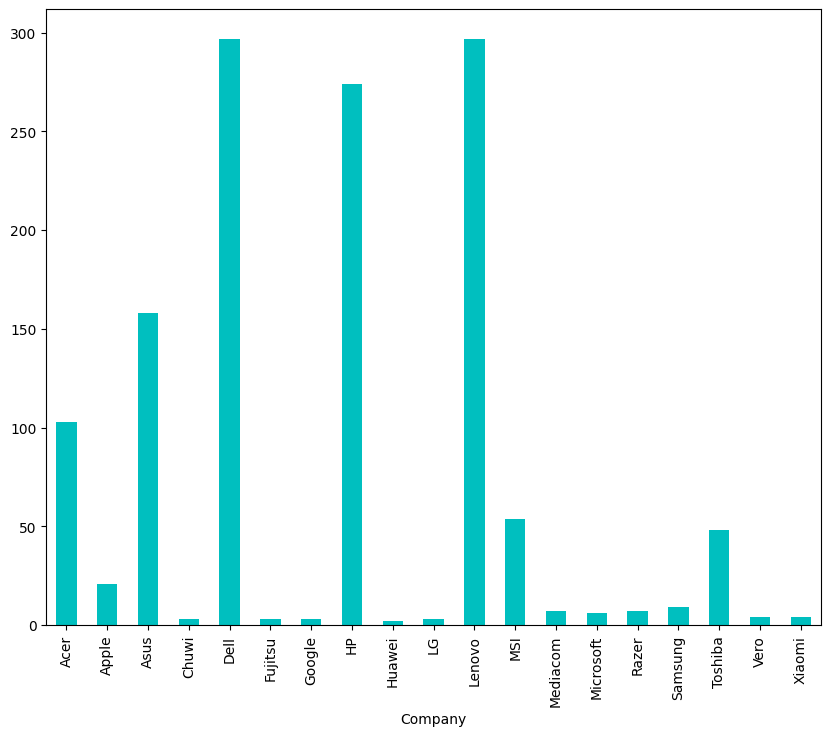

In [28]:
import matplotlib.pyplot as plt
comp = data.groupby('Company').size()
comp.plot(kind = "bar", figsize = (10,8), color = 'c')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

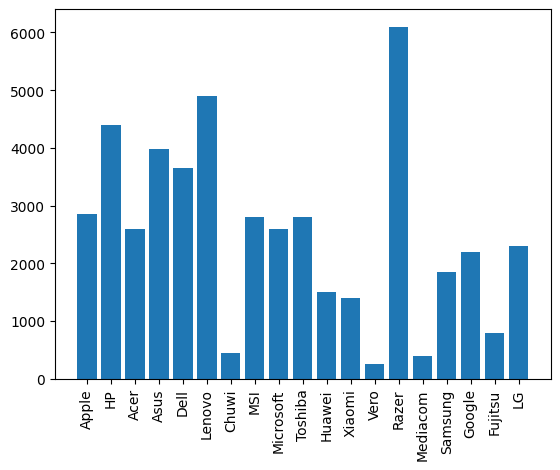

In [30]:
x = data['Company']
y = data['Price_euros']
Figure = figsize = (15,10)
plt.bar(x,y)
plt.xticks(rotation = 90)